(optim)=
# Optimization

**THIS CHAPTER IS CURRENTLY UNDER CONSTRUCTION!!!**

## Gradient descent in one variable

Consider the optimization problem of locating the minimum values of the polynomial function

$$
J(\theta) = \theta^4 - 6\theta^3 + 11\theta^2 - 7\theta + 4.
$$

This function is called the _objective function_ of the optimization problem. Its graph is displayed in:

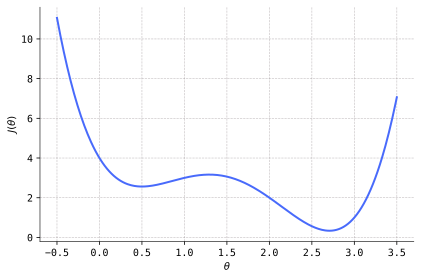

In [1]:
import torch
from torch.utils.data import DataLoader
from torch.distributions.multivariate_normal import MultivariateNormal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
from itertools import product
import warnings
plt.style.use('../aux-files/custom_style_light.mplstyle')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings("ignore")
blue = '#486AFB'
magenta = '#FD46FC'

def J(theta):
    return (theta ** 4) - 6 * (theta ** 3) + 11 * (theta ** 2) - 7 * theta + 4

grid = torch.linspace(start=-0.5, end=3.5, steps=300)
plt.plot(grid, J(grid))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$J(\theta)$')
plt.gcf().set_size_inches(w=6, h=4)
plt.tight_layout()

From the graph, we see that the objective function is minimized near $\theta^\star\approx 0.5$ and $2.7$; these values are called _minimizers_ of the objective function.

We shall use a simple single-variable version of the _gradient descent (GD) algorithm_ to solve this optimization problem. In this context, the GD algorithm is called the _optimizer_. This algorithm depends on an initial guess for a minimizer, as well as two parameters called the _learning rate_ and the _number of gradient steps_. We will state the algorithm first, and then walk through some intuition for why it works:

```{prf:algorithm} Single-variable gradient descent

**Inputs:** A differentiable objective function $J(\theta):\mathbb{R}\to \mathbb{R}$, an initial guess $\theta_0\in \mathbb{R}$ for a minimizer $\theta^\star$, a _learning rate_ $\gamma>0$, and the _number $N$ of gradient steps_.

**Outputs:** An approximation to a minimizer $\theta^\star$.

1. For $t$ from $1$ to $N$, do:
    * $\theta_t := \theta_{t-1} - \gamma J'(\theta_{t-1})$
2. Return $\theta_N$.
```

Beginning from an initial guess $\theta_0$ for a minimizer, the GD algorithm outputs a sequence of approximations $\theta_1,\theta_2,\ldots,\theta_N$ for a minimizer. The last value $\theta_N$ in the sequence is taken as the output of the algorithm; if the algorithm converges to a minimizer, then we should have $\theta_N \approx \theta^\star$.

The equation

```{math}
:label: update-rule-eqn

\theta_t := \theta_{t-1} - \gamma J'(\theta_{t-1})
```

in the `for` loop is called the _update rule_; we say that the new parameter $\theta_t$ is obtained by taking a _gradient step_ from $\theta_{t-1}$. The first update occurs when $t=1$, yielding

$$
\theta_1 := \theta_{0} - \gamma J'(\theta_{0}).
$$

To understand the intuition for this rule, consider the two cases that the derivative $J'(\theta_0)$ is positive or negative:

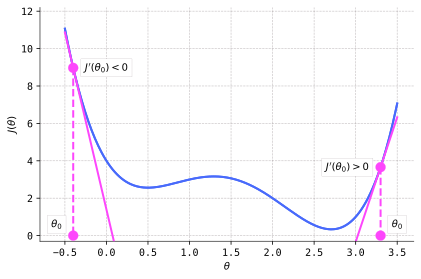

In [2]:
def J_prime(theta):
    return 4 * (theta ** 3) - 18 * (theta ** 2) + 22 * theta - 7

plt.plot(grid, J(grid), color=blue)
plt.plot(grid, J_prime(-0.4) * (grid + 0.4) + J(-0.4), color=magenta, zorder=10)
plt.scatter(-0.4, J(-0.4), color=magenta, s=100, zorder=15)
plt.scatter(-0.4, 0, color=magenta, s=100, zorder=20)
plt.plot([-0.4, -0.4], [J(-0.4), 0], color=magenta, linestyle='--')
plt.xlim(-0.8, 3.7)
plt.ylim(-0.3, 12.2)
plt.text(-0.6, 0.6, r'$\theta_0$', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
plt.text(0, J(-0.4), r"$J'(\theta_0)<0$", ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))

plt.plot(grid, J(grid))
plt.plot(grid, J_prime(3.3) * (grid - 3.3) + J(3.3))
plt.scatter(3.3, J(3.3), color=magenta, s=100, zorder=10)
plt.scatter(3.3, 0, color=magenta, s=100, zorder=10)
plt.plot([3.3, 3.3], [J(3.3), 0], color=magenta, linestyle='--')
plt.text(3.5, 0.6, r'$\theta_0$', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
plt.text(2.9, J(3.3), r"$J'(\theta_0)>0$", ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))

plt.xlabel(r'$\theta$')
plt.ylabel(r'$J(\theta)$')
plt.gcf().set_size_inches(w=6, h=4)
plt.tight_layout()

In this plot, we've drawn the tangent lines to the graph of $J(\theta)$ at two initial values $\theta_0=-0.4$ and $\theta_0=3.3$. Since the derivatives are the slopes of these tangent lines, the sign of the derivative is negative when $\theta_0=-0.4$ and positive when $\theta_0 = 3.3$. In the first case, we have

```{math}
:label: first-update-eqn

\theta_1 = -0.4 - \gamma J'(-0.4) > -0.4
```

since $\gamma>0$, while in the second case we have

```{math}
:label: second-update-eqn

\theta_1 = 3.3 - \gamma J'(3.3) < 3.3.
```

But notice that the nearest minimizer to $\theta_0 = -0.4$ is $\theta^\star \approx 0.5$, and so the new $\theta_1$ computed according to {eq}`first-update-eqn` should be closer to $\theta^\star$ than the initial guess $\theta_0$, provided that the (scaled) negative derivative

```{math}
:label: neg-derivative-eqn
-\gamma J'(\theta_0)
```

is not too large (in magnitude) causing the new $\theta_1$ to "overshoot" the minimizer $\theta^\star$. Similarly, the nearest minimizer to $\theta_0 = 3.3$ is $\theta^\star \approx 2.7$, so the new $\theta_1$ computed according to {eq}`second-update-eqn` should be closer to $\theta^\star$ than $\theta_0$, again provided that the (scaled) negative derivative {eq}`neg-derivative-eqn` is not too large in magnitude.

From these considerations, we conclude that the negative derivative $-J(\theta_0)$ always "points downhill," in the sense that it is positive if the point $(\theta_0,J(\theta_0))$ sits on a decreasing portion of the graph of $J(\theta)$, and it is negative if $(\theta_0,J(\theta_0))$ is on an increasing portion of the graph. The role of the learning rate $\gamma$ is to scale down the magnitude of the negative derivative so that the gradient step in the update rule

$$
\theta_1 = \theta_0 - \gamma J'(\theta_0)
$$

does not cause $\theta_1$ to "overshoot" a nearby minimizer.

Let's run the GD algorithm four times, with various settings of the parameters:

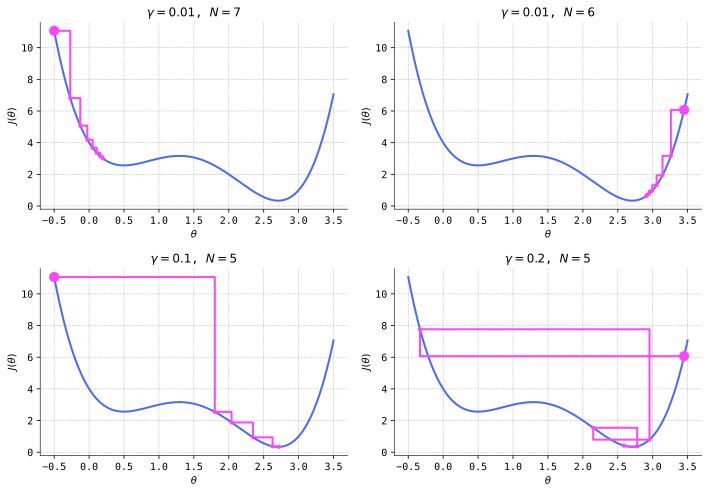

In [3]:
# implement the GD algorithm in PyTorch
def GD(init_theta, J, num_steps, lr):
    
    # deep copy the initial parameter start tracking gradients
    theta = init_theta.clone().requires_grad_(True)
    
    # initialize lists to track objective values and thetas
    running_objectives = []
    running_thetas = []

    # begin gradient descent loop
    for _ in range(num_steps):
        # compute objective with current theta
        objective = J(theta)
        
        # compute gradients
        objective.backward()
        
        # append current objective and theta to running lists
        running_objectives.append(objective.detach())
        running_thetas.append(theta.detach().clone())
        
        # take a step and update the theta
        with torch.no_grad():
            theta -= lr * theta.grad

        # zero out the gradient to prepare for the next iteration
        theta.grad.zero_()

    return running_thetas, running_objectives

# plot objective function
grid = torch.linspace(start=-0.5, end=3.5, steps=300)
axes_idx = list(product(range(2), repeat=2))
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
for i in range(4):
    idx = axes_idx[i]
    axes[idx].plot(grid, J(grid))

# parameters for gradient descent
gd_parameters = {'init_theta': [torch.tensor([-0.5]), torch.tensor([3.45]), torch.tensor([-0.5]), torch.tensor([3.45])],
                 'num_steps': [8, 7, 6, 6],
                 'lr': [1e-2, 1e-2, 1e-1, 2e-1]}

# run gradient descent and plot
for i in range(4):
    kwargs = {key: gd_parameters[key][i] for key in gd_parameters.keys()}
    running_thetas, running_objectives = GD(**kwargs, J=J)
    idx = axes_idx[i]
    lr = kwargs['lr']
    num_steps = kwargs['num_steps'] - 1
    axes[idx].step(x=running_thetas, y=running_objectives, where='post', color=magenta, zorder=2)
    axes[idx].scatter(x=running_thetas, y=running_objectives, color=magenta, zorder=2)
    axes[idx].scatter(x=running_thetas[0], y=running_objectives[0], s=100, color=magenta, zorder=2)
    axes[idx].set_xlabel(r'$\theta$')
    axes[idx].set_ylabel(r'$J(\theta)$')
    axes[idx].set_title(f'$\gamma={lr}$, $N={num_steps}$')
plt.tight_layout()

In all four plots, the large magenta dot represents the initial point $(\theta_0,J(\theta_0))$, while the smaller dots represent the points

$$
(\theta_1,J(\theta_1)), (\theta_2, J(\theta_2)),\ldots, (\theta_N,J(\theta_N)),
$$

where $N$ is the number of gradient steps in the `for` loop in the GD algorithm. Take care to notice the effect of the learning rate $\gamma$ in the plots!











## Gradient descent in multiple variables

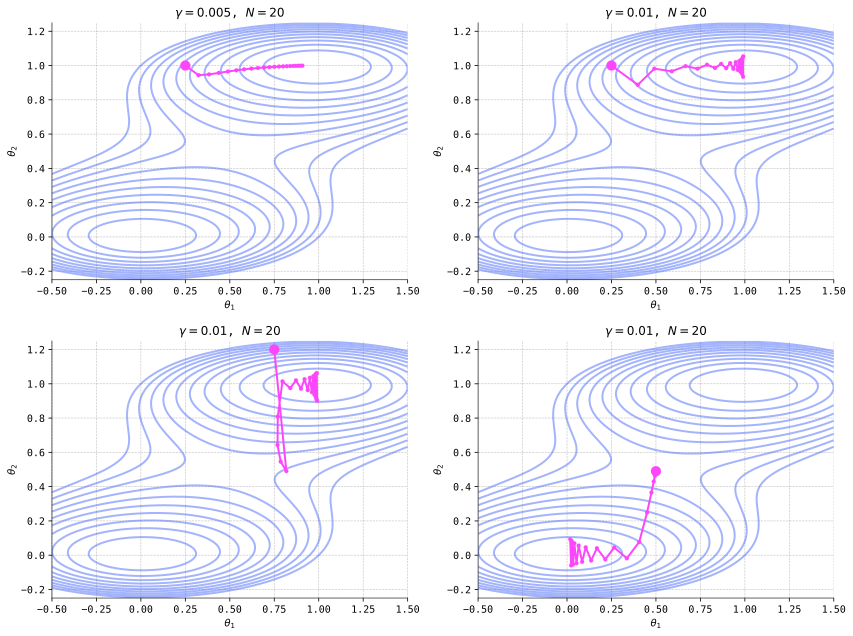

In [4]:
# define the objective function
def J(theta):
    theta_1, theta_2 = (theta[:, 0], theta[:, 1]) if theta.ndim == 2 else theta
    return (theta_1 ** 2 + 10 * theta_2 ** 2) * ((theta_1 - 1) ** 2 + 10 * (theta_2 - 1) ** 2)

# plot contours of objective function
linspace_x = torch.linspace(start=-0.5, end=1.5, steps=200)
linspace_y = torch.linspace(start=-0.25, end=1.25, steps=200)
x, y = torch.meshgrid(linspace_x, linspace_y)
grid = torch.column_stack(tensors=(x.reshape(-1, 1), y.reshape(-1, 1)))
z = J(grid).reshape(x.shape)
axes_idx = list(product(range(2), repeat=2))
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
for k in range(4):
    idx = axes_idx[k]
    axes[idx].contour(x, y, z, levels=range(11), colors=blue, alpha=0.5)

# parameters for gradient descent
gd_parameters = {'init_theta': [torch.tensor([0.25, 1]), torch.tensor([0.25, 1]), torch.tensor([0.75, 1.2]), torch.tensor([0.5, 0.49])],
                 'num_steps': [21, 21, 21, 21],
                 'lr': [5e-3, 1e-2, 1e-2, 1e-2]}

# run gradient descent and plot
for i in range(4):
    kwargs = {key: gd_parameters[key][i] for key in gd_parameters.keys()}
    running_thetas, running_objectives = GD(**kwargs, J=J)
    idx = axes_idx[i]
    thetas = torch.row_stack(tensors=running_thetas)
    lr = kwargs['lr']
    num_steps = kwargs['num_steps'] - 1
    axes[idx].plot(thetas[:, 0], thetas[:, 1], color=magenta)
    axes[idx].scatter(thetas[:, 0], thetas[:, 1], color=magenta, zorder=2)
    axes[idx].scatter(x=thetas[0, 0], y=thetas[0, 1], s=100, color=magenta, zorder=2)
    axes[idx].set_xlabel(r'$\theta_1$')
    axes[idx].set_ylabel(r'$\theta_2$')
    axes[idx].set_title(f'$\gamma={lr}$, $N={num_steps}$')
plt.tight_layout()

## Stochastic gradient descent

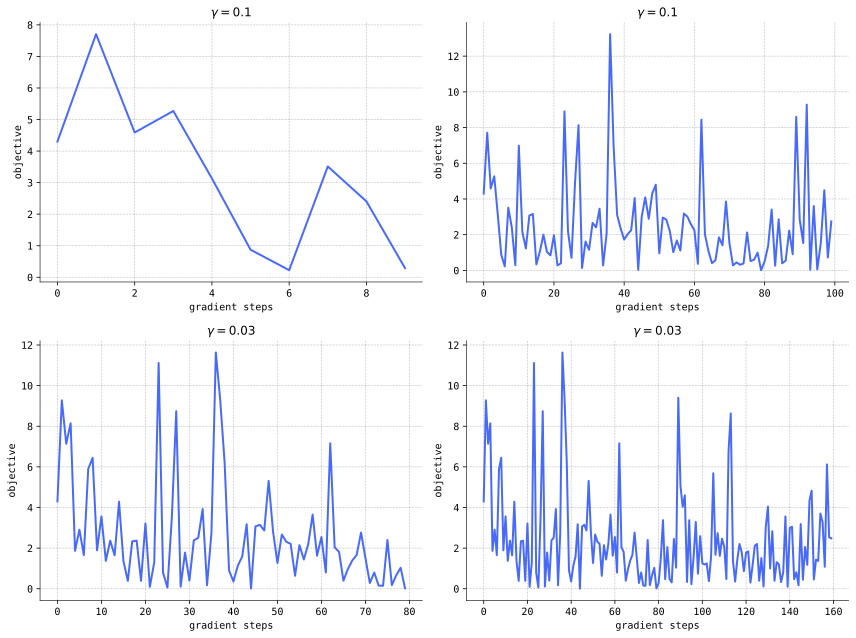

In [5]:
# implement the SGD algorithm in PyTorch
def SGD(init_parameters, dataset, J, num_epochs, batch_size, lr, tracking, max_steps=-1, shuffle=True, random_state=None, verbose=False):
    
    # deep copy the initial parameters into a parameter dictionary and start tracking gradients
    parameters = {name: parameter.clone().requires_grad_(True) for name, parameter in init_parameters.items()}

    # define data loader
    if random_state is not None:
        torch.manual_seed(random_state)
    data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle)
    
    # initialize lists and a dictionary to track objectives and parameters
    running_objectives = []
    running_parameters = {name: [parameter.detach().clone()] for name, parameter in parameters.items()}
    step_count = 0

    # begin looping through epochs
    for epoch in range(num_epochs):
        
        # initialize a list to track per-step objectives
        per_step_objectives = []
        
        # begin gradient descent loop
        for mini_batch in data_loader:
            
            # compute objective with current parameters
            objective = J(mini_batch, parameters)

            # if we are tracking per gradient step, then add objective value to the 
            # list of running objectives. otherwise, we are tracking per epoch, so
            # add the objective value to the list of per-step objectives
            if tracking == 'gd_step':
                running_objectives.append(objective.item())
            else:
                per_step_objectives.append(objective.item())
        
            # compute gradients    
            objective.backward()

            # take a gradient step and update the parameters
            with torch.no_grad():
                for parameter in parameters.values():
                    parameter -= lr * parameter.grad
            
            # zero out the gradients to prepare for the next iteration
            for parameter in parameters.values():
                parameter.grad.zero_()

            # if we are tracking per gradient step, then add the new parameters to
            # the list of running parameters
            if tracking == 'gd_step':
                for name in parameters.keys():
                    running_parameters[name].append(parameters[name].detach().clone())

            # if we hit the maximum number of gradient steps, break out of the inner `for`
            # loop
            step_count += 1
            if step_count == max_steps:
                break
        
        # if we hit the maximum number of gradient steps, break out of the outer `for`
        # loop
        if step_count == max_steps:
            break
                
    # if we are tracking per epoch, then add the average per-step objective to the
    # list of running objectives. also, add the current parameters to the list of running
    # parameters
    if tracking == 'epoch':
        running_objectives.append(np.mean(per_step_objectives))
        running_parameters.append([parameter.detach().clone() for parameter in parameters])

    # if we are tracking per epoch and verbose == True, then print out the running objectives
    if verbose & (tracking == 'epoch'):
        print(f'epoch {epoch + 1} of {num_epochs} --- objective: {running_objectives[-1]:.4f}')
                
    return running_parameters, running_objectives

# define the objective function
def g(x, parameters):
    if not isinstance(parameters, dict):
        raise TypeError('Parameters must be a dictionary of tensors.')
    theta = list(parameters.values())[0]
    return torch.norm(theta - x, dim=1) ** 2

def J(x, parameters):
    return torch.mean(g(x, parameters))

# generate data
torch.manual_seed(42)
dataset = MultivariateNormal(loc=torch.zeros(2), covariance_matrix=torch.eye(2)).sample(sample_shape=(1024,))

# get grids for contour plots
linspace = torch.linspace(start=-2, end=2, steps=200)
grid_1, grid_2 = torch.meshgrid(linspace, linspace)
grid = torch.column_stack(tensors=(grid_1.reshape(-1, 1), grid_2.reshape(-1, 1)))
z_list = []
for theta in grid:
    z_list.append(J(dataset, {'theta': theta}))
z = torch.row_stack(tensors=z_list).reshape(shape=grid_1.shape)

# SGD parameters
init_parameters = {'theta': torch.tensor([1.5, 1.5])}
num_epochs = 1
batch_size = 1
random_state = 42
gd_parameters = {'lr': [1e-1, 1e-1, 3e-2, 3e-2],
               'max_steps': [10, 100, 80, 160]}
parameters_list = []
objectives_list = []

# run SGD
for i in range(4):
    kwargs = {key: gd_parameters[key][i] for key in gd_parameters.keys()}
    running_parameters, running_objectives = SGD(init_parameters=init_parameters,
                                                 dataset=dataset,
                                                 J=J,
                                                 tracking='gd_step',
                                                 num_epochs=1,
                                                 batch_size=batch_size,
                                                 random_state=random_state,
                                                 shuffle=True,
                                                 **kwargs)
    parameters_list.append(running_parameters)
    objectives_list.append(running_objectives)

# plot the objective function
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

for i in range(4):
    idx = axes_idx[i]
    objectives = objectives_list[i]
    kwargs = {key: gd_parameters[key][i] for key in gd_parameters.keys()}
    lr = kwargs['lr']
    axes[idx].plot(range(len(objectives)), objectives)
    axes[idx].set_xlabel('gradient steps')
    axes[idx].set_ylabel('objective')
    axes[idx].set_title(f'$\gamma={lr}$')

plt.tight_layout()

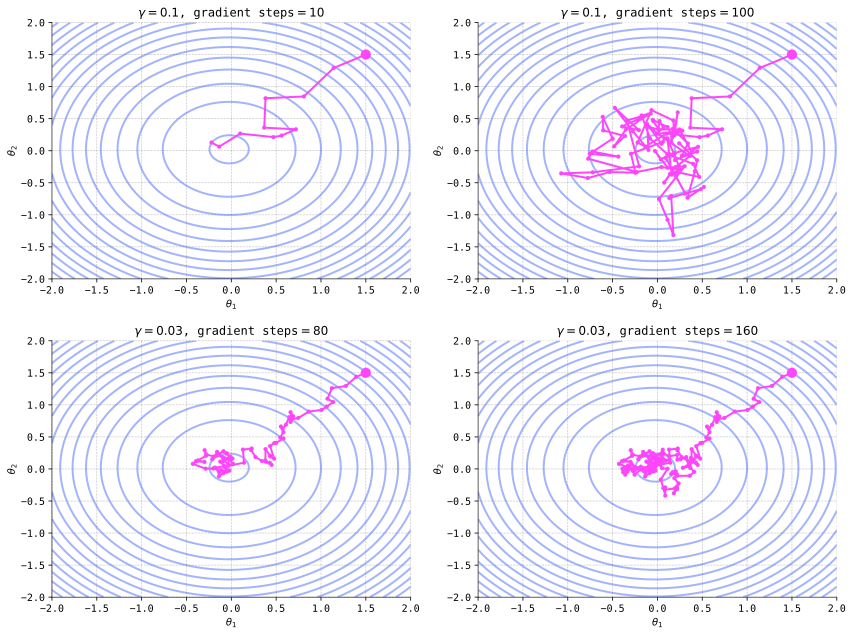

In [6]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

for i in range(4):
    idx = axes_idx[i]
    thetas = torch.row_stack(tensors=parameters_list[i]['theta'])
    kwargs = {key: gd_parameters[key][i] for key in gd_parameters.keys()}
    lr = kwargs['lr']
    max_steps = kwargs['max_steps']
    axes[idx].contour(grid_1, grid_2, z, levels=torch.arange(start=0, end=10, step=0.5), colors=blue, alpha=0.5)
    axes[idx].plot(thetas[:, 0], thetas[:, 1], color=magenta)
    axes[idx].scatter(thetas[:, 0], thetas[:, 1], color=magenta, zorder=2)
    axes[idx].scatter(thetas[0, 0], thetas[0, 1], s=100, color=magenta, zorder=2)
    axes[idx].set_title(f'$\gamma={lr}$, gradient steps$={max_steps}$')
    axes[idx].set_xlabel(r'$\theta_1$')
    axes[idx].set_ylabel(r'$\theta_2$')

plt.tight_layout()

## Mini-batch gradient descent

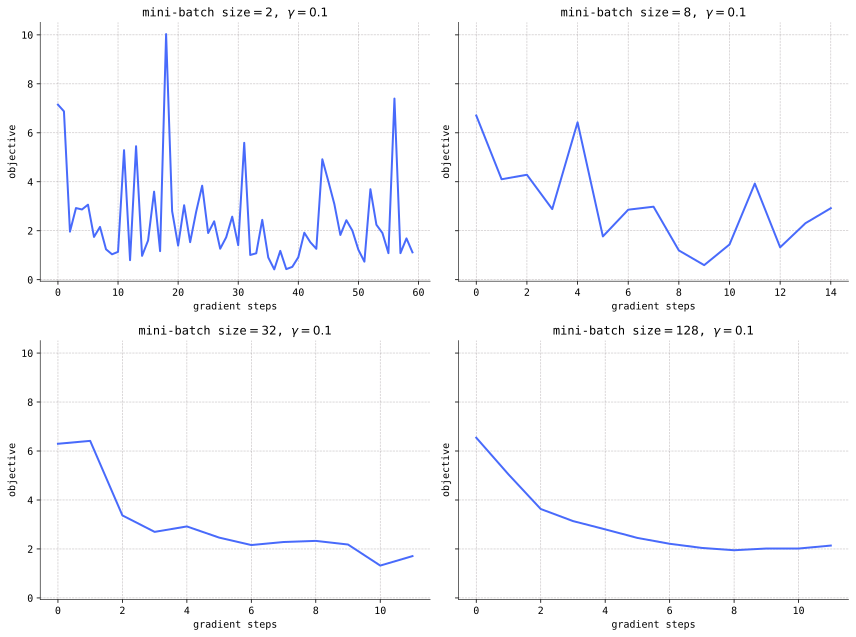

In [7]:
# mini-batch gradient descent parameters
init_parameters = {'theta': torch.tensor([1.5, 1.5])}
random_state = 42
gd_parameters = {'num_epochs': [1, 1, 1, 2],
               'lr': [1e-1, 1e-1, 1e-1, 1e-1],
               'batch_size': [2, 8, 32, 128],
               'max_steps': [60, 15, 12, 12]}
parameters_list = []
objectives_list = []

# run mini-batch gradient descent
for i in range(4):
    kwargs = {key: gd_parameters[key][i] for key in gd_parameters.keys()}
    running_parameters, running_objectives = SGD(init_parameters=init_parameters,
                             dataset=dataset,
                             J=J,
                             tracking='gd_step',
                             random_state=random_state,
                             shuffle=True,
                             **kwargs)
    parameters_list.append(running_parameters)
    objectives_list.append(running_objectives)

# plot the objective function
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9), sharey=True)

for i in range(4):
    idx = axes_idx[i]
    objectives = objectives_list[i]
    kwargs = {key: gd_parameters[key][i] for key in gd_parameters.keys()}
    batch_size = kwargs['batch_size']
    lr = kwargs['lr']
    axes[idx].plot(range(len(objectives)), objectives)
    axes[idx].set_xlabel('gradient steps')
    axes[idx].set_ylabel('objective')
    axes[idx].set_title(f'mini-batch size$={batch_size}$, $\gamma={lr}$')

plt.tight_layout()

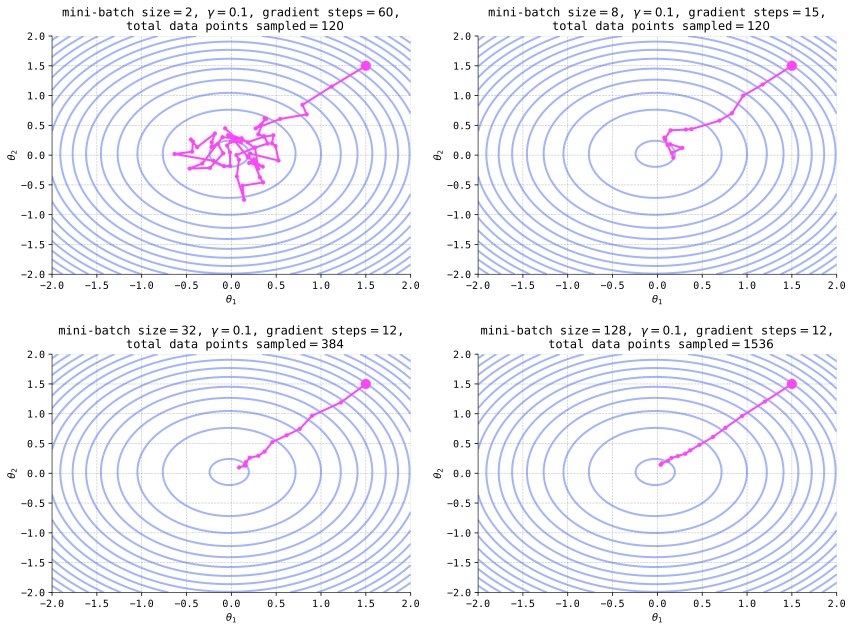

In [8]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

for i in range(4):
    idx = axes_idx[i]
    thetas = torch.row_stack(tensors=parameters_list[i]['theta'])
    kwargs = {key: gd_parameters[key][i] for key in gd_parameters.keys()}
    batch_size = kwargs['batch_size']
    lr = kwargs['lr']
    max_steps = kwargs['max_steps']
    total_data_points = batch_size * max_steps
    axes[idx].contour(grid_1, grid_2, z, levels=torch.arange(start=0, end=10, step=0.5), colors=blue, alpha=0.5)
    axes[idx].plot(thetas[:, 0], thetas[:, 1], color=magenta)
    axes[idx].scatter(thetas[:, 0], thetas[:, 1], color=magenta, zorder=2)
    axes[idx].scatter(thetas[0, 0], thetas[0, 1], s=100, color=magenta, zorder=2)
    axes[idx].set_title(f'mini-batch size$={batch_size}$, $\gamma={lr}$, gradient steps$={max_steps}$,\n total data points sampled$={total_data_points}$')
    axes[idx].set_xlabel(r'$\theta_1$')
    axes[idx].set_ylabel(r'$\theta_2$')

plt.tight_layout()